In [1]:
print("hello")

hello


In [2]:
import pandas as pd
df  = pd.read_csv("ner.csv")
print(df.head(5))

                                                text  \
0  Thousands of demonstrators have marched throug...   
1  Iranian officials say they expect to get acces...   
2  Helicopter gunships Saturday pounded militant ...   
3  They left after a tense hour-long standoff wit...   
4  U.N. relief coordinator Jan Egeland said Sunda...   

                                              labels  
0  O O O O O O B-geo O O O O O B-geo O O O O O B-...  
1  B-gpe O O O O O O O O O O O O O O B-tim O O O ...  
2  O O B-tim O O O O O B-geo O O O O O B-org O O ...  
3                              O O O O O O O O O O O  
4  B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47959 entries, 0 to 47958
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47959 non-null  object
 1   labels  47959 non-null  object
dtypes: object(2)
memory usage: 749.5+ KB
None


In [4]:
df.describe()

,text,labels
count,47959,47959
unique,47575,33318
top,VOA 's Mil Arcega reports .,O O O O O O O O O O O
freq,17,450


In [5]:
missing_values = df.isnull().sum()

In [6]:
missing_values

text      0
labels    0
dtype: int64

In [7]:
from collections import Counter
labels = df['labels']
# Combine all labels into a single list
all_labels = [label for sublist in labels for label in sublist.split()]

# Count the frequency of each label
label_counts = Counter(all_labels)

# Display the most common labels
print("Most common labels:\n", label_counts.most_common())


Most common labels:
 [('O', 887908), ('B-geo', 37644), ('B-tim', 20333), ('B-org', 20143), ('I-per', 17251), ('B-per', 16990), ('I-org', 16784), ('B-gpe', 15870), ('I-geo', 7414), ('I-tim', 6528), ('B-art', 402), ('B-eve', 308), ('I-art', 297), ('I-eve', 253), ('B-nat', 201), ('I-gpe', 198), ('I-nat', 51)]


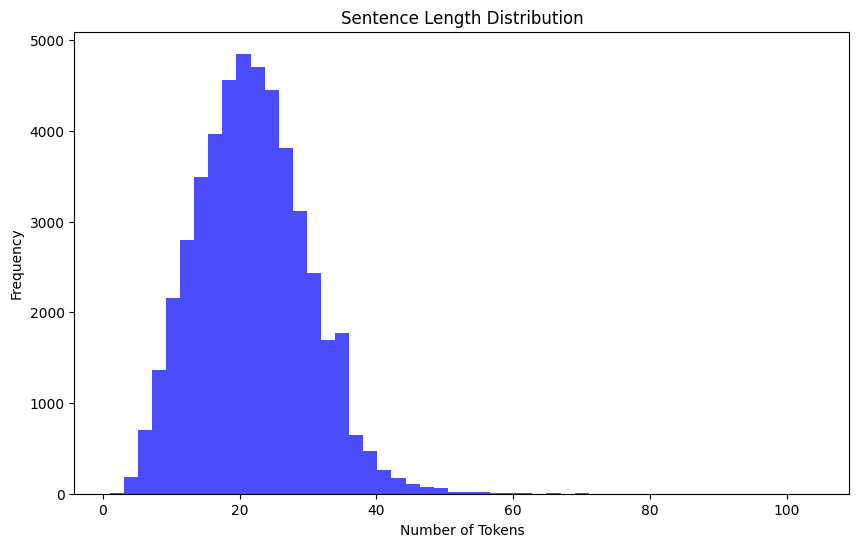

In [8]:
import matplotlib.pyplot as plt
texts = df['text']

# Calculate the length of each sentence
sentence_lengths = [len(text.split()) for text in texts]

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Sentence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


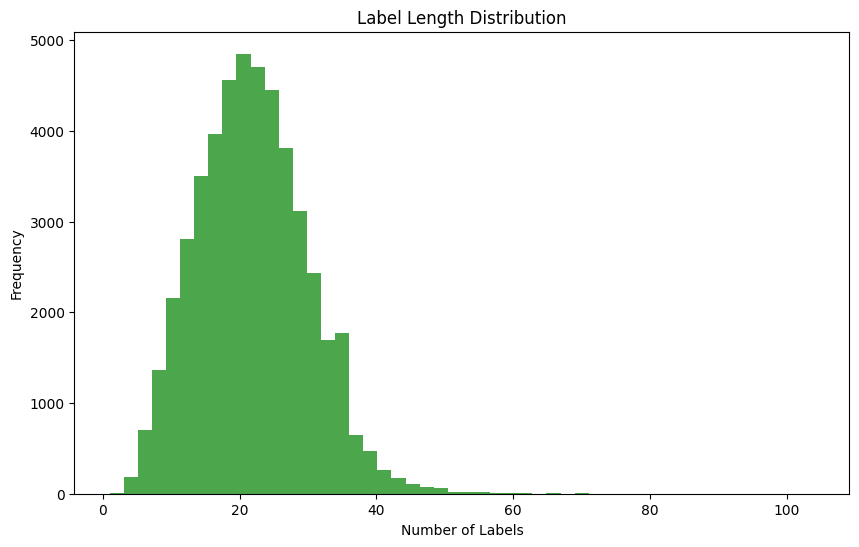

In [9]:
# Calculate the length of each label sequence
label_lengths = [len(label.split()) for label in labels]

# Plot the distribution of label lengths
plt.figure(figsize=(10, 6))
plt.hist(label_lengths, bins=50, color='green', alpha=0.7)
plt.title('Label Length Distribution')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Display some sample sentences and their labels
for i in range(5):
    print(f"Sentence {i+1}: {texts[i]}")
    print(f"Labels {i+1}: {labels[i]}")
    print("\n")


Sentence 1: Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .
Labels 1: O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O


Sentence 2: Iranian officials say they expect to get access to sealed sensitive parts of the plant Wednesday , after an IAEA surveillance system begins functioning .
Labels 2: B-gpe O O O O O O O O O O O O O O B-tim O O O B-org O O O O O


Sentence 3: Helicopter gunships Saturday pounded militant hideouts in the Orakzai tribal region , where many Taliban militants are believed to have fled to avoid an earlier military offensive in nearby South Waziristan .
Labels 3: O O B-tim O O O O O B-geo O O O O O B-org O O O O O O O O O O O O O O B-geo I-geo O


Sentence 4: They left after a tense hour-long standoff with riot police .
Labels 4: O O O O O O O O O O O


Sentence 5: U.N. relief coordinator Jan Egeland said Sunday , U.S. , Indonesian and Australian military h

In [11]:
# Function to identify and remove mismatched entries
def remove_mismatches(texts, labels):
    valid_texts = []
    valid_labels = []
    for i in range(len(texts)):
        if len(texts[i]) == len(labels[i]):
            valid_texts.append(texts[i])
            valid_labels.append(labels[i])
    return valid_texts, valid_labels
# Split the text and labels into lists
texts = df['text'].tolist()
labels = df['labels'].tolist()
# Tokenize the texts and labels
tokenized_texts = [text.split() for text in texts]
tokenized_labels = [label.split() for label in labels]

# Remove mismatched entries
valid_texts, valid_labels = remove_mismatches(tokenized_texts, tokenized_labels)

# Display the number of valid and invalid entries
print(f"Total valid entries: {len(valid_texts)}")
print(f"Total invalid entries removed: {len(texts) - len(valid_texts)}")

# Display a sample to confirm alignment
print("Sample tokenized text and labels:")
print(valid_texts[0])
print(valid_labels[0])





Total valid entries: 47946
Total invalid entries removed: 13
Sample tokenized text and labels:
['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']
['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O']


In [12]:
# Create a list of all unique labels
unique_labels = list(set(label for label_list in tokenized_labels for label in label_list))

# Create a dictionary to map labels to indices
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}

# Convert labels to indices
indexed_labels = [[label_to_index[label] for label in label_list] for label_list in tokenized_labels]

# Display the mapping and a sample
print("Label to index mapping:")
print(label_to_index)
print("Sample indexed labels:")
print(indexed_labels[0])


Label to index mapping:
{'B-geo': 0, 'B-per': 1, 'B-art': 2, 'I-tim': 3, 'B-tim': 4, 'I-eve': 5, 'I-gpe': 6, 'I-per': 7, 'I-nat': 8, 'B-nat': 9, 'I-art': 10, 'B-eve': 11, 'B-gpe': 12, 'I-geo': 13, 'O': 14, 'B-org': 15, 'I-org': 16}
Sample indexed labels:
[14, 14, 14, 14, 14, 14, 0, 14, 14, 14, 14, 14, 0, 14, 14, 14, 14, 14, 12, 14, 14, 14, 14, 14]


In [13]:
!pip install keras
!pip install tensorflow


  Using cached tensorflow-2.17.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.6 kB)
  Using cached tensorboard-2.17.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a list of all unique labels
unique_labels = list(set(label for label_list in valid_labels for label in label_list))

# Create a dictionary to map labels to indices
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
index_to_label = {idx: label for label, idx in label_to_index.items()}

# Convert labels to indices
indexed_labels = [[label_to_index[label] for label in label_list] for label_list in valid_labels]

# Display the mapping and a sample
print("Label to index mapping:")
print(label_to_index)
print("Sample indexed labels:")
print(indexed_labels[0])


2024-07-21 11:52:17.506119: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-21 11:52:17.522036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 11:52:17.538619: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 11:52:17.542950: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-21 11:52:17.551506: I tensorflow/core/platform/cpu_feature_guar

Label to index mapping:
{'B-geo': 0, 'B-per': 1, 'B-art': 2, 'I-tim': 3, 'B-tim': 4, 'I-eve': 5, 'I-gpe': 6, 'I-per': 7, 'I-nat': 8, 'B-nat': 9, 'I-art': 10, 'B-eve': 11, 'B-gpe': 12, 'I-geo': 13, 'O': 14, 'B-org': 15, 'I-org': 16}
Sample indexed labels:
[14, 14, 14, 14, 14, 14, 0, 14, 14, 14, 14, 14, 0, 14, 14, 14, 14, 14, 12, 14, 14, 14, 14, 14]


In [15]:
# Convert tokenized texts to indices
vocab = list(set(word for sentence in valid_texts for word in sentence))
word_to_index = {word: idx for idx, word in enumerate(vocab)}

indexed_texts = [[word_to_index[word] for word in sentence] for sentence in valid_texts]

# Pad sequences to ensure uniform length
max_len = max(len(sentence) for sentence in valid_texts)

padded_texts = pad_sequences(indexed_texts, maxlen=max_len, padding='post')
padded_labels = pad_sequences(indexed_labels, maxlen=max_len, padding='post', value=label_to_index['O'])

# Convert to numpy arrays
padded_texts = np.array(padded_texts)
padded_labels = np.array(padded_labels)

# Display the shapes of the prepared data
print("Shape of padded texts:", padded_texts.shape)
print("Shape of padded labels:", padded_labels.shape)


Shape of padded texts: (47946, 104)
Shape of padded labels: (47946, 104)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Define model parameters
input_dim = len(vocab)
output_dim = len(unique_labels)
input_length = max_len

# Define the model
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=50, input_length=input_length))
model.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(output_dim, activation='softmax')))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Build the model by providing an example input
model.build(input_shape=(None, input_length))

# Display the model summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 104, 50)        │     1,757,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 104, 200)       │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 104, 17)        │         3,417 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,882,067 (7.18 MB)

 Trainable params: 1,882,067 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(padded_texts, padded_labels, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 144s 117ms/step - accuracy: 0.9676 - loss: 0.1819 - val_accuracy: 0.9911 - val_loss: 0.0301
Epoch 2/5
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 139s 116ms/step - accuracy: 0.9928 - loss: 0.0246 - val_accuracy: 0.9926 - val_loss: 0.0244
Epoch 3/5
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 135s 113ms/step - accuracy: 0.9948 - loss: 0.0170 - val_accuracy: 0.9929 - val_loss: 0.0235
Epoch 4/5
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 133s 111ms/step - accuracy: 0.9955 - loss: 0.0142 - val_accuracy: 0.9930 - val_loss: 0.0235
Epoch 5/5
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 136s 113ms/step - accuracy: 0.9961 - loss: 0.0119 - val_accuracy: 0.9929 - val_loss: 0.0245


In [20]:
model.save('ner_model.h5')

In [21]:
model.save('ner1_model.keras')

In [22]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('ner_model.h5')

# Display the model summary
loaded_model.summary()

# Use the loaded model for prediction or further training
# Example: predictions = loaded_model.predict(padded_texts)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 104, 50)        │     1,757,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 104, 200)       │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 104, 17)        │         3,417 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,882,069 (7.18 MB)

 Trainable params: 1,882,067 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Assume word_to_index, index_to_label, and max_len are already defined

# Load the trained model
loaded_model = load_model('ner_model.h5')

# Preprocess the input text
def preprocess_text(text, word_to_index, max_len):
    tokens = text.split()
    token_indices = [word_to_index.get(word, word_to_index['UNK']) for word in tokens]
    padded_token_indices = pad_sequences([token_indices], maxlen=max_len, padding='post')
    return tokens, padded_token_indices

# Make predictions
def make_predictions(model, text, word_to_index, index_to_label, max_len):
    tokens, padded_token_indices = preprocess_text(text, word_to_index, max_len)
    predictions = model.predict(padded_token_indices)
    predicted_label_indices = np.argmax(predictions, axis=-1)[0]
    predicted_labels = [index_to_label[idx] for idx in predicted_label_indices]
    return tokens, predicted_labels

# Align the predicted labels with the original tokens
def align_labels(tokens, predicted_labels):
    aligned_labels = []
    for token, label in zip(tokens, predicted_labels):
        aligned_labels.append((token, label))
    return aligned_labels

# Example input text
input_text = "John Doe works at Acme Corp."

# Preprocess the input text and make predictions
tokens, predicted_labels = make_predictions(loaded_model, input_text, word_to_index, index_to_label, max_len)

# Align the predicted labels with the original tokens
aligned_predictions = align_labels(tokens, predicted_labels)

# Display the predictions
for token, label in aligned_predictions:
    print(f"{token}: {label}")
